In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.preprocessing as preprocessing 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
y = df_train["label"]
df_train.drop("label",axis = 1,inplace = True)

In [4]:
df = pd.concat([df_train,df_test],ignore_index=True)

In [5]:
df.head()

,link,link_id,page_description,alchemy_category,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,...,image_ratio,is_news,lengthy_link_domain,link_word_score,news_front_page,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio
0,http://www.cbc.ca/stevenandchris/2012/11/peggy...,7426,"{""url"":""cbc ca stevenandchris 2012 11 peggy ks...",arts_entertainment,0.471752,1.725275,0.469388,0.204082,0.112245,0.010204,...,0.074074,1,0,39,0,1236,98,8,0.061224,0.076125
1,http://www.instructables.com/id/Vegan-Baked-Po...,8430,"{""title"":""Vegan Potato Spinach Balls Fat Free ...",recreation,0.885088,0.847134,0.134783,0.043478,0.021739,0.000000,...,0.228464,1,1,15,0,3887,230,8,0.330435,0.130742
2,http://www.oled-info.com/toshiba-shows-ultra-t...,3469,"{""title"":""Toshiba shows an ultra thin flexible...",business,0.716379,2.613333,0.546667,0.293333,0.160000,0.120000,...,0.088050,1,1,57,0,780,75,8,0.160000,0.076471
3,http://www.collegehumor.com/videos/playlist/64...,1326,"{""url"":""collegehumor videos playlist 6472556 e...",arts_entertainment,0.562999,1.434286,0.369792,0.088542,0.000000,0.000000,...,1.000000,1,0,35,0,2388,192,6,0.005208,0.090909
4,http://sports.yahoo.com/nba/blog/ball_dont_lie...,3580,"{""title"":""Shaq admits to taking performance en...",sports,0.893246,1.781333,0.530713,0.208845,0.071253,0.019656,...,6.166667,1,1,39,0,5020,407,11,0.299754,0.093023


In [6]:
df.shape

(7395, 26)

In [7]:
df.describe()

,link_id,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,embed_ratio,frame_based,frame_tag_ratio,has_domain_link,html_ratio,image_ratio,lengthy_link_domain,link_word_score,non_markup_alphanumeric_characters,count_of_links,number_of_words_in_url,parametrized_link_ratio,spelling_mistakes_ratio
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,5305.704665,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.0,0.056423,0.021231,0.233778,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221
std,3048.384114,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.0,0.041446,0.144162,0.052487,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2688.500000,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.0,0.028502,0.000000,0.201061,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739
50%,5304.000000,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.0,0.045775,0.000000,0.230564,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312
75%,7946.500000,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.0,0.073459,0.000000,0.260770,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376
max,10566.000000,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.0,0.444444,1.000000,0.716883,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   link                                7395 non-null   object 
 1   link_id                             7395 non-null   int64  
 2   page_description                    7395 non-null   object 
 3   alchemy_category                    7395 non-null   object 
 4   alchemy_category_score              7395 non-null   object 
 5   avg_link_size                       7395 non-null   float64
 6   common_word_link_ratio_1            7395 non-null   float64
 7   common_word_link_ratio_2            7395 non-null   float64
 8   common_word_link_ratio_3            7395 non-null   float64
 9   common_word_link_ratio_4            7395 non-null   float64
 10  compression_ratio                   7395 non-null   float64
 11  embed_ratio                         7395 no

In [9]:
df.isna().sum()

link                                  0
link_id                               0
page_description                      0
alchemy_category                      0
alchemy_category_score                0
avg_link_size                         0
common_word_link_ratio_1              0
common_word_link_ratio_2              0
common_word_link_ratio_3              0
common_word_link_ratio_4              0
compression_ratio                     0
embed_ratio                           0
frame_based                           0
frame_tag_ratio                       0
has_domain_link                       0
html_ratio                            0
image_ratio                           0
is_news                               0
lengthy_link_domain                   0
link_word_score                       0
news_front_page                       0
non_markup_alphanumeric_characters    0
count_of_links                        0
number_of_words_in_url                0
parametrized_link_ratio               0


In [10]:
(df == '?').sum()

link                                     0
link_id                                  0
page_description                         0
alchemy_category                      2342
alchemy_category_score                2342
avg_link_size                            0
common_word_link_ratio_1                 0
common_word_link_ratio_2                 0
common_word_link_ratio_3                 0
common_word_link_ratio_4                 0
compression_ratio                        0
embed_ratio                              0
frame_based                              0
frame_tag_ratio                          0
has_domain_link                          0
html_ratio                               0
image_ratio                              0
is_news                               2843
lengthy_link_domain                      0
link_word_score                          0
news_front_page                       1248
non_markup_alphanumeric_characters       0
count_of_links                           0
number_of_w

In [11]:
df["alchemy_category"].describe()

count     7395
unique      14
top          ?
freq      2342
Name: alchemy_category, dtype: object

In [12]:
df["alchemy_category"].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [13]:
df["alchemy_category"].replace("?","recreation",inplace = True) #replacing with mode
df["alchemy_category"].value_counts()

recreation            3571
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [14]:
df["alchemy_category_score"].describe()

count     7395
unique    4806
top          ?
freq      2342
Name: alchemy_category_score, dtype: object

In [15]:
df["alchemy_category_score"].replace("?",0,inplace = True)
df["alchemy_category_score"] = pd.to_numeric(df["alchemy_category_score"])
df["alchemy_category_score"].replace(0,df["alchemy_category_score"].sum()/5053,inplace = True)

In [16]:
df["alchemy_category_score"].describe()

count    7395.000000
mean        0.603334
std         0.175952
min         0.070833
25%         0.538758
50%         0.603334
75%         0.708279
max         0.999426
Name: alchemy_category_score, dtype: float64

In [17]:
(df == '?').sum()

link                                     0
link_id                                  0
page_description                         0
alchemy_category                         0
alchemy_category_score                   0
avg_link_size                            0
common_word_link_ratio_1                 0
common_word_link_ratio_2                 0
common_word_link_ratio_3                 0
common_word_link_ratio_4                 0
compression_ratio                        0
embed_ratio                              0
frame_based                              0
frame_tag_ratio                          0
has_domain_link                          0
html_ratio                               0
image_ratio                              0
is_news                               2843
lengthy_link_domain                      0
link_word_score                          0
news_front_page                       1248
non_markup_alphanumeric_characters       0
count_of_links                           0
number_of_w

In [18]:
df["is_news"].describe()

count     7395
unique       2
top          1
freq      4552
Name: is_news, dtype: object

In [19]:
df["is_news"].unique()

array(['1', '?'], dtype=object)

In [20]:
df["news_front_page"].value_counts()

0    5853
?    1248
1     294
Name: news_front_page, dtype: int64

In [21]:
df["news_front_page"].replace("?","0",inplace = True)
df["news_front_page"] = pd.to_numeric(df["news_front_page"])

In [22]:
df["news_front_page"].value_counts()

0    7101
1     294
Name: news_front_page, dtype: int64

In [23]:
df.drop("is_news",axis = 1,inplace = True)

In [24]:
(df == "?").sum()

link                                  0
link_id                               0
page_description                      0
alchemy_category                      0
alchemy_category_score                0
avg_link_size                         0
common_word_link_ratio_1              0
common_word_link_ratio_2              0
common_word_link_ratio_3              0
common_word_link_ratio_4              0
compression_ratio                     0
embed_ratio                           0
frame_based                           0
frame_tag_ratio                       0
has_domain_link                       0
html_ratio                            0
image_ratio                           0
lengthy_link_domain                   0
link_word_score                       0
news_front_page                       0
non_markup_alphanumeric_characters    0
count_of_links                        0
number_of_words_in_url                0
parametrized_link_ratio               0
spelling_mistakes_ratio               0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   link                                7395 non-null   object 
 1   link_id                             7395 non-null   int64  
 2   page_description                    7395 non-null   object 
 3   alchemy_category                    7395 non-null   object 
 4   alchemy_category_score              7395 non-null   float64
 5   avg_link_size                       7395 non-null   float64
 6   common_word_link_ratio_1            7395 non-null   float64
 7   common_word_link_ratio_2            7395 non-null   float64
 8   common_word_link_ratio_3            7395 non-null   float64
 9   common_word_link_ratio_4            7395 non-null   float64
 10  compression_ratio                   7395 non-null   float64
 11  embed_ratio                         7395 no

In [26]:
df["frame_based"].value_counts()

0    7395
Name: frame_based, dtype: int64

In [27]:
df.drop("frame_based", axis = 1 , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   link                                7395 non-null   object 
 1   link_id                             7395 non-null   int64  
 2   page_description                    7395 non-null   object 
 3   alchemy_category                    7395 non-null   object 
 4   alchemy_category_score              7395 non-null   float64
 5   avg_link_size                       7395 non-null   float64
 6   common_word_link_ratio_1            7395 non-null   float64
 7   common_word_link_ratio_2            7395 non-null   float64
 8   common_word_link_ratio_3            7395 non-null   float64
 9   common_word_link_ratio_4            7395 non-null   float64
 10  compression_ratio                   7395 non-null   float64
 11  embed_ratio                         7395 no

In [28]:
df.duplicated().sum()

0

In [29]:
column_names_to_one_hot = ["alchemy_category"]
df = pd.get_dummies(df, columns = column_names_to_one_hot)

In [30]:
import nltk
#nltk.download('punkt')
#nltk.download('wordnet')

In [31]:
import re
df_page = df["page_description"]

for i in range(df.shape[0]):
    df_page[i] = re.sub(r'[^\w\s]','',df_page[i])
    
for i in range(df.shape[0]):
    df_page[i] = re.sub(r'[\d]','',df_page[i])

C:\Users\Prasad\AppData\Local\Temp\ipykernel_6448\1029180878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_page[i] = re.sub(r'[^\w\s]','',df_page[i])
C:\Users\Prasad\AppData\Local\Temp\ipykernel_6448\1029180878.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_page[i] = re.sub(r'[\d]','',df_page[i])


In [32]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = 'True')
page_feature = feature_extraction.fit_transform(df_page)
x_df = pd.DataFrame(page_feature.toarray())

In [33]:
token = [[]] * df.shape[0]
for i in range(df.shape[0]):
    token[i] = nltk.word_tokenize(df_page[i].lower())    

In [34]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.append('youre')

In [35]:
word_list=[]
for text in token:
    no_stopwords = [word for word in text if word not in stop_words]
    word_list.append(no_stopwords)

In [36]:
from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

lemma_list = []
for word in word_list:
    filter_data = []
    for data in word:
        filter_data.append(lemmatizer.lemmatize(data))
    lemma_list.append(filter_data)    

In [37]:
unique_list=[]
for data in lemma_list:
    set_data = set(data)
    temp=[]
    for word in set_data:
        temp.append(word)
    unique_list.append(temp)

# Exploratory Data Analysis

# Skewness

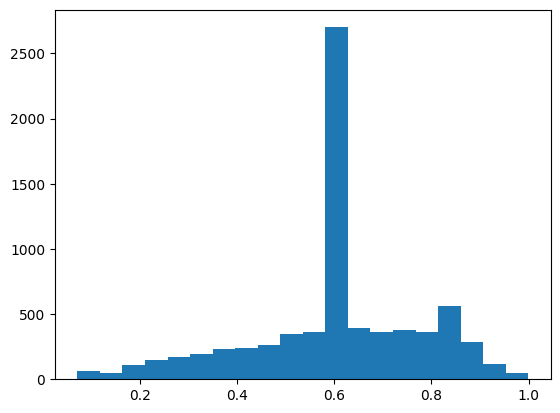

In [38]:
plt.hist(df["alchemy_category_score"], bins=20)
plt.show()

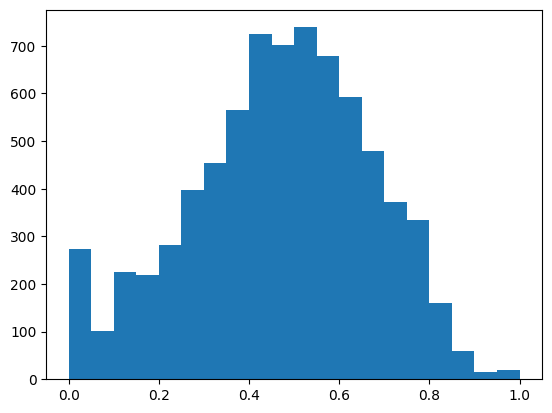

In [39]:
plt.hist(df["common_word_link_ratio_1"], bins=20)
plt.show()

# Standardization

In [40]:
df_new = df.drop(["link","page_description","link_id"],axis = 1)
df_new_columns=df_new.columns

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in df_new_columns:
    df_new[i] = scaler.fit_transform(df_new[i].to_numpy().reshape(-1, 1)).reshape(-1)

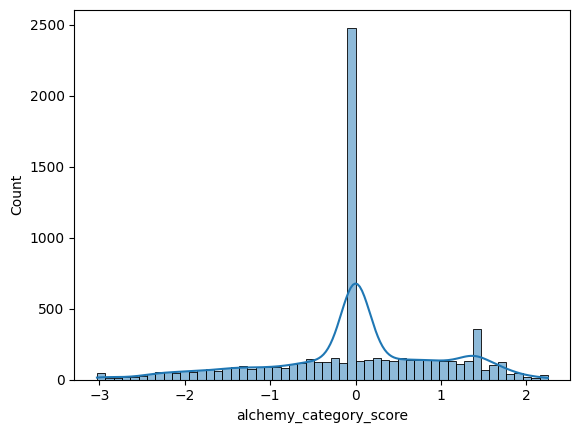

In [42]:
sns.histplot(df_new["alchemy_category_score"], kde=True)
plt.show()

# Outlier

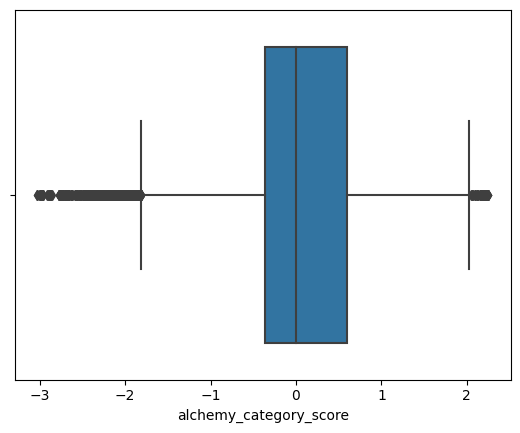

In [43]:
sns.boxplot(x=df_new["alchemy_category_score"])
plt.show()

In [44]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
   
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))


In [45]:
score=df["alchemy_category_score"]
score_outlier_remover = OutlierRemoval(score.quantile(0.25), score.quantile(0.75))

In [46]:
outlier_removed_score = score.apply(score_outlier_remover.removeOutlier)

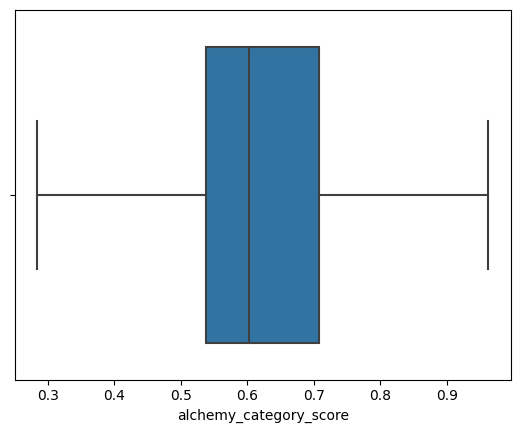

In [47]:
sns.boxplot(x=outlier_removed_score)
plt.show()

In [48]:
df_new["alchemy_category_score"]=outlier_removed_score

# Correlation

In [49]:
df_new.corr()

,alchemy_category_score,avg_link_size,common_word_link_ratio_1,common_word_link_ratio_2,common_word_link_ratio_3,common_word_link_ratio_4,compression_ratio,embed_ratio,frame_tag_ratio,has_domain_link,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
alchemy_category_score,1.000000,-0.013482,0.090126,0.057799,0.031462,0.018891,-0.090807,0.078887,-0.054501,0.020167,...,-0.027292,-0.053962,0.163688,-0.039172,-0.154907,-0.094391,-0.059256,0.087551,-0.036339,-0.001645
avg_link_size,-0.013482,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,-0.049270,-0.002046,...,0.037126,-0.003634,0.014828,-0.001189,-0.030412,0.005313,0.012597,-0.009702,-0.000010,0.011769
common_word_link_ratio_1,0.090126,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,-0.294860,0.006790,...,0.011926,-0.067362,0.081700,0.000864,0.019163,-0.021502,0.005058,-0.017911,-0.025392,0.000127
common_word_link_ratio_2,0.057799,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,-0.259222,0.000263,...,0.007112,-0.052645,0.075565,-0.003811,0.001705,-0.002064,0.005694,-0.014854,-0.019195,0.001924
common_word_link_ratio_3,0.031462,0.174554,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,-0.218559,-0.031097,...,0.021413,-0.034898,0.019714,0.002508,0.012863,-0.003948,-0.003874,-0.013576,-0.013713,-0.013370
common_word_link_ratio_4,0.018891,0.134527,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,-0.178064,-0.052519,...,0.028267,-0.025737,-0.021232,0.006688,0.006691,-0.000544,0.004487,-0.011861,-0.005039,-0.006076
compression_ratio,-0.090807,-0.003578,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,0.159335,0.027657,...,-0.039923,0.015222,-0.044299,0.010690,0.163004,0.005277,-0.029797,-0.042611,0.001192,0.055231
embed_ratio,0.078887,0.005254,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,-0.130753,-0.026473,...,0.033730,-0.012849,0.051675,-0.005218,-0.151787,-0.002317,0.027458,0.048825,-0.005849,-0.049047
frame_tag_ratio,-0.054501,-0.049270,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,1.000000,0.010193,...,0.001021,0.017438,-0.007429,0.040857,-0.045288,0.039599,0.031270,0.042129,0.029006,0.065581
has_domain_link,0.020167,-0.002046,0.006790,0.000263,-0.031097,-0.052519,0.027657,-0.026473,0.010193,1.000000,...,-0.005719,-0.005707,0.034396,0.004963,0.011612,-0.014604,-0.005497,-0.030029,-0.004197,-0.003426


In [50]:
train1=df_new.iloc[:4437,:]
test1=df_new.iloc[4437:,:]

train2=x_df.iloc[:4437,:]
test2=x_df.iloc[4437:,:]

# Learning Algorithm

In [51]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.model_selection import train_test_split 

In [52]:
#X = pd.concat([df_new, x_df],axis = 1).to_numpy().astype(np.float64)
X = pd.concat([train1[['alchemy_category_score']], train2],axis = 1).to_numpy().astype(np.float64)
y = y.to_numpy().astype(np.float64)

In [53]:
X.shape

(4437, 96287)

In [54]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7)

In [55]:
logistic_regression_model = LogisticRegression(max_iter=1000)

In [56]:
logistic_regression_model.fit(X,y)

LogisticRegression(max_iter=1000)

In [57]:
train_yhat = logistic_regression_model.predict(train_X)

In [58]:
train_yhat_probability=logistic_regression_model.predict_proba(test_X)
lr_probs = train_yhat_probability[:, 1]
lr_auc = roc_auc_score(test_y, lr_probs)
lr_auc

0.9575058679457087

In [59]:
print(accuracy_score(train_y, train_yhat), f1_score(train_y, train_yhat))

0.8747181964573268 0.8694192682108091


In [60]:
test_yhat = logistic_regression_model.predict(test_X)

In [61]:
print(accuracy_score(test_y, test_yhat), f1_score(test_y, test_yhat))

0.8746246246246246 0.8763878608438195


In [62]:
X = pd.concat([test1[['alchemy_category_score']], test2],axis = 1).to_numpy().astype(np.float64)

In [63]:
train_yhat_probability=logistic_regression_model.predict_proba(X)
submission=pd.DataFrame(df_test["link_id"])
temp=[]
for p in train_yhat_probability:
    temp.append(max(p[0],p[1]))

submission.insert(1,"label",temp,True)

submission.to_csv('sample_2.csv')